1、两点分布（伯努利分布）
伯努利试验：
伯努利试验是在同样的条件下重复地、各次之间相互独立地进行的一种试验。
即只先进行一次伯努利试验，该事件发生的概率为p，不发生的概率为1-p。这是一个最简单的分布，任何一个只有两种结果的随机现象都服从0-1分布。
最常见的例子为抛硬币
其中，
期望E = p
方差D = p*(1-p)^2+(1-p)*(0-p)^2 = p*(1-p)

2、二项分布（n重伯努利分布）（X~B(n,p））
即做n个两点分布的实验
其中，
E = np
D = np(1-p)

# 对于抛硬币的问题，做100次实验，观察其概率分布函数：

In [1]:
from scipy.stats import binom
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
 ## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
n = 100
p = 0.5
#平均值, 方差, 偏度, 峰度
mean,var,skew,kurt = binom.stats(n,p,moments='mvsk')

In [2]:
mean,var,skew,kurt 

(array(50.), array(25.), array(0.), array(-0.02))

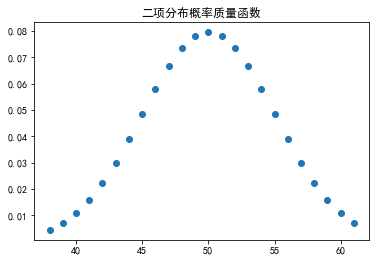

In [3]:
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
fig,ax = plt.subplots(1,1)
x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p),'o')
plt.title(u'二项分布概率质量函数')
plt.show()

3、几何分布（X ～ GE(p)）
在n次伯努利实验中，第k次实验才得到第一次成功的概率分布。其中：P(k) = (1-p)^(k-1)*p
E = 1/p  推到方法就是利用利用错位相减法然后求lim - k ->无穷 
D = (1-p)/p^2  推到方法利用了D(x) = E(x)^2-E(x^2)，其中E(x^2)求解同上

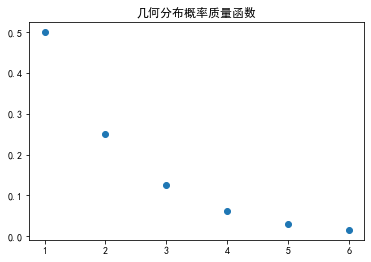

In [6]:
from scipy.stats import geom
fig,ax = plt.subplots(1,1)
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x = np.arange(geom.ppf(0.01, p),geom.ppf(0.99, p))
ax.plot(x, geom.pmf(x, p),'o')
plt.title(u'几何分布概率质量函数')
plt.show()

4、泊松分布（X~P(λ)）
描述单位时间/面积内，随机事件发生的次数。P(x = k) = λ^k/k!*e^(-λ)   k = 0,1,2, ...    λ >0
泊松分布可作为二项分布的极限而得到。一般的说，若  ，其中n很大，p很小，因而  不太大时，X的分布接近于泊松分布  。
λ：单位时间/面积下，随机事件的平均发生率
E = λ
D = λ
譬如：某一服务设施一定时间内到达的人数、一个月内机器损坏的次数等。
 假设某地区，一年中发生枪击案的平均次数为2。

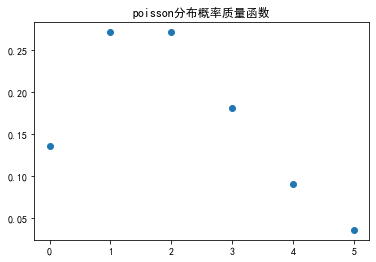

In [8]:
from scipy.stats import poisson
mu = 2    #平均发生率
#平均值, 方差, 偏度, 峰度
mean,var,skew,kurt = poisson.stats(mu,moments='mvsk')
fig,ax = plt.subplots(1,1)
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x = np.arange(poisson.ppf(0.01, mu),poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu),'o')
plt.title(u'poisson分布概率质量函数')
plt.show()

与二项分布对比

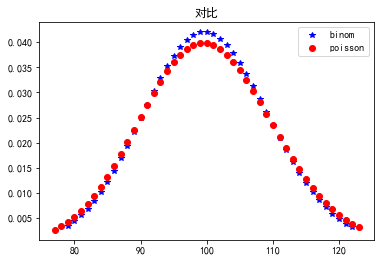

In [9]:
fig,ax = plt.subplots(1,1)
n = 1000   #次数
p = 0.1    #概率
#平均值, 方差, 偏度, 峰度
mean,var,skew,kurt = binom.stats(n,p,moments='mvsk')
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
p1, = ax.plot(x, binom.pmf(x, n, p),'b*',label = 'binom')
mu = n*p
#平均值, 方差, 偏度, 峰度
mean,var,skew,kurt = poisson.stats(mu,moments='mvsk')
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x = np.arange(poisson.ppf(0.01, mu),poisson.ppf(0.99, mu))
p2, = ax.plot(x, poisson.pmf(x, mu),'ro',label = 'poisson')
plt.legend(handles = [p1, p2])
plt.title(u'对比')
plt.show()

 5、均匀分布（X~U(a,b)）

Text(0.5, 1.0, '均匀分布概率密度函数')

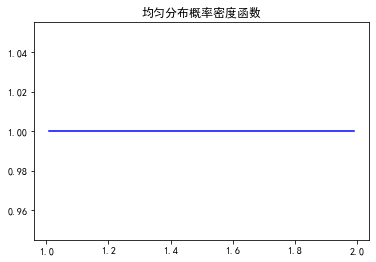

In [12]:
from scipy.stats import uniform
fig,ax = plt.subplots(1,1) 
loc = 1
scale = 1 
#平均值, 方差, 偏度, 峰度
mean,var,skew,kurt = uniform.stats(loc,scale,moments='mvsk')
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x = np.linspace(uniform.ppf(0.01,loc,scale),uniform.ppf(0.99,loc,scale),100)
ax.plot(x, uniform.pdf(x,loc,scale),'b-',label = 'uniform')
plt.title(u'均匀分布概率密度函数')

6、指数分布X~ E（λ）

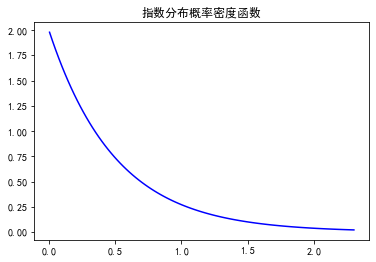

In [13]:
from scipy.stats import expon
fig,ax = plt.subplots(1,1)
lambdaUse = 2
loc = 0
scale = 1.0/lambdaUse
#平均值, 方差, 偏度, 峰度
mean,var,skew,kurt = expon.stats(loc,scale,moments='mvsk')
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x = np.linspace(expon.ppf(0.01,loc,scale),expon.ppf(0.99,loc,scale),100)
ax.plot(x, expon.pdf(x,loc,scale),'b-',label = 'expon')
plt.title(u'指数分布概率密度函数')
plt.show()

7、正态分布（X~N(μ，σ^2)）

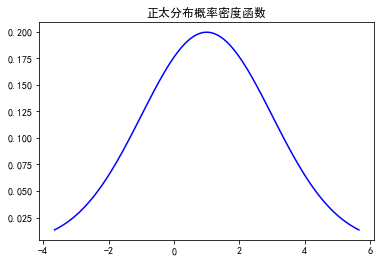

In [14]:
from scipy.stats import norm
fig,ax = plt.subplots(1,1)
loc = 1
scale = 2.0
#平均值, 方差, 偏度, 峰度
mean,var,skew,kurt = norm.stats(loc,scale,moments='mvsk')
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x = np.linspace(norm.ppf(0.01,loc,scale),norm.ppf(0.99,loc,scale),100)
ax.plot(x, norm.pdf(x,loc,scale),'b-',label = 'norm')
plt.title(u'正太分布概率密度函数')
plt.show()